# My Principal Component Analysis Lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

Helper function to display images

In [2]:
def display_image(img, title="Image", cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('on')
    plt.show()

### Example 1: Finding Modes of Variation in Data

#### Generating 3D data and applying PCA

In [5]:
pt = np.random.rand(3, 5000)
print(pt)

[[0.54481787 0.78404097 0.83721084 ... 0.79650787 0.07205052 0.66910362]
 [0.89156945 0.74026652 0.48688357 ... 0.48175435 0.49805245 0.08298698]
 [0.54946574 0.48223943 0.2858824  ... 0.46723643 0.27774414 0.83894988]]


Plot 3D points

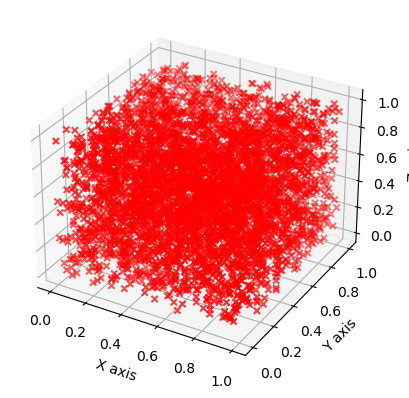

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt[0, :], pt[1, :], pt[2, :], c='r', marker='x')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Multiply the y-coordinate by 5

In [6]:
pt[1,:] = pt[1,:] * 5

Plot modified 3D points

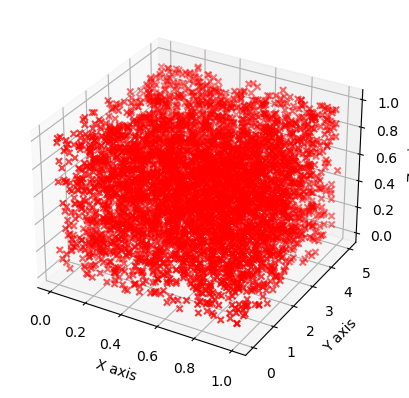

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt[0, :], pt[1, :], pt[2, :], c='r', marker='x')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### Example 2: Manually Computing the Eigenmodel (PCA)

#### Compute the mean of the 3D points

We need to reshape the row vector to be a column vector in order to subtract each row's mean from the pt matrix.

In [ ]:
org = np.mean(pt, axis=1).reshape(-1, 1)
print("Data Mean:\n", org)

Data Mean:
 [[0.50243186]
 [2.47454471]
 [0.49434297]]


Subtract the mean

In [21]:
ptsub = pt - org
print("Original Matrix (pt):\n", pt)
print("Mean-centered Data:\n", ptsub)

Original Matrix (pt):
 [[4.24018724e-01 4.95577444e-01 1.06663195e-01 ... 5.67431078e-01
  2.12612239e-02 8.37776957e-01]
 [3.13354464e+00 1.42760861e+00 1.71868539e-01 ... 1.36743497e+00
  6.64120497e-01 4.14940853e+00]
 [4.05201837e-01 6.81436626e-01 4.00365608e-03 ... 2.38448624e-01
  9.03471670e-01 7.84361214e-01]]
Mean-centered Data:
 [[-0.07841314 -0.00685442 -0.39576867 ...  0.06499922 -0.48117064
   0.3353451 ]
 [ 0.65899992 -1.04693611 -2.30267617 ... -1.10710974 -1.81042422
   1.67486382]
 [-0.08914113  0.18709366 -0.49033931 ... -0.25589434  0.4091287
   0.29001825]]


Compute the covariance matrix

In [16]:
C = np.cov(ptsub)
print("Covariance Matrix:\n", C)

Covariance Matrix:
 [[ 8.39586815e-02 -6.33299085e-03 -3.67294467e-04]
 [-6.33299085e-03  2.04982116e+00  1.07082454e-03]
 [-3.67294467e-04  1.07082454e-03  8.32598082e-02]]


Decompose the covariance matrix into eigenvectors and eigenvalues

In [18]:
val, vct = np.linalg.eig(C)
print("Eigenvalues:\n", val)
print("Eigenvectors:\n", vct)

Eigenvalues:
 [2.04984215 0.08409641 0.0831011 ]
Eigenvectors:
 [[-3.22153239e-03  9.17124655e-01  3.98587492e-01]
 [ 9.99994662e-01  3.17183763e-03  7.84130733e-04]
 [ 5.45109176e-04 -3.98587890e-01  9.17129978e-01]]


### Example 3: Distance from an Eigenmodel 

#### Building color model and finding similar pixels

Load the target image and normalize it

In [ ]:
target = cv2.imread('testimages/target_yellow.bmp').astype(np.float64) / 255.0